In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset  = pd.read_csv("diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
corr = dataset.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


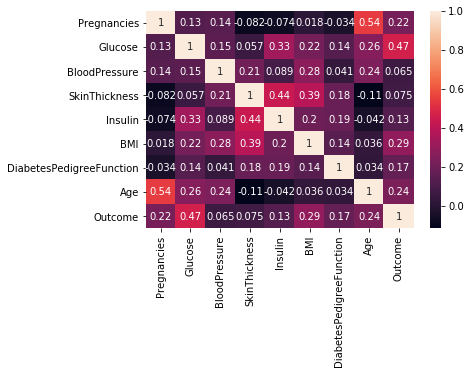

In [5]:
sns.heatmap(corr, annot = True)

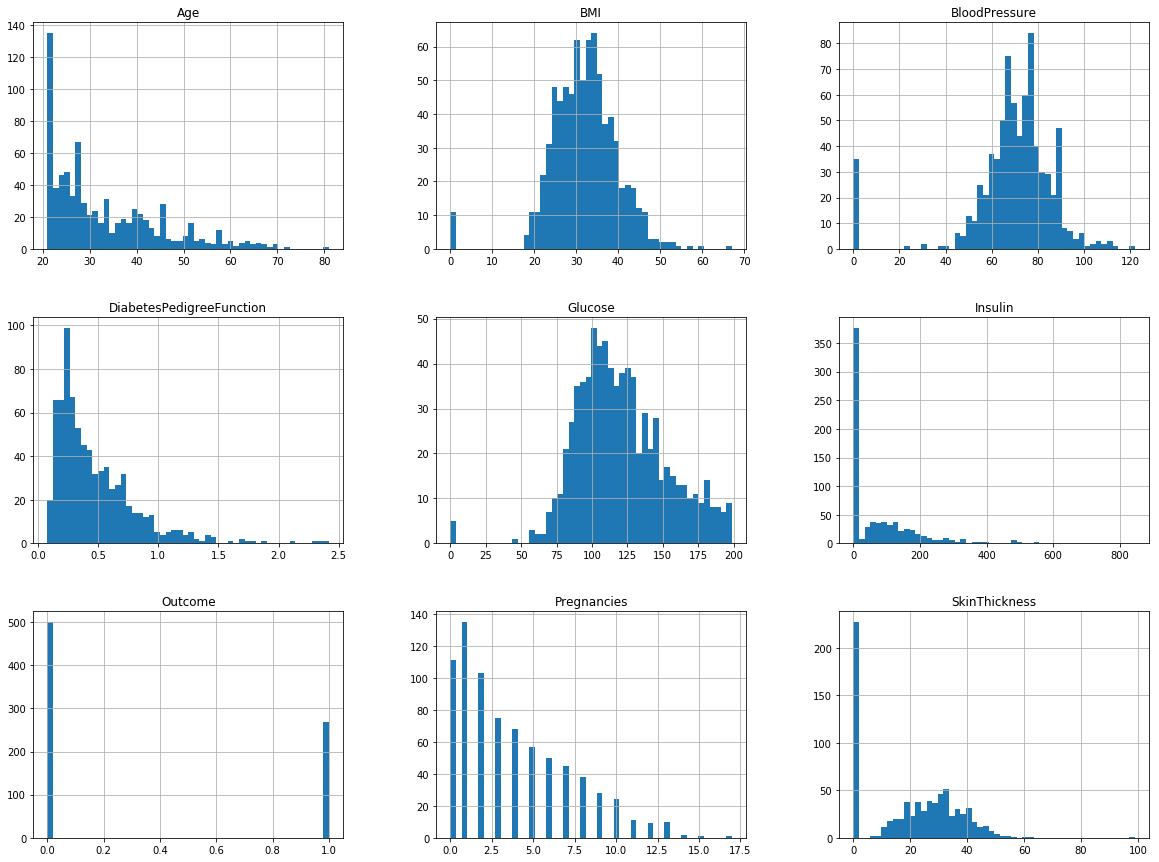

In [6]:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

# 1. Scaling

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

train_set_labels = train_set["Outcome"].copy()
train_set = train_set.drop("Outcome", axis=1)

test_set_labels = test_set["Outcome"].copy()
test_set = test_set.drop("Outcome", axis=1)


In [8]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

df = pd.DataFrame(data=train_set_scaled)
df.head()

C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
import time
start = time.time()


models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DT', DecisionTreeClassifier(min_samples_split = 12)))

In [10]:
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels
X.shape
Y.shape


for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (
        name, cv_results.mean())
    print(msg)
end = time.time()
print(end - start)

LR: 0.749127
KNN: 0.731412
NB: 0.742729


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\

SVC: 0.753993
LSVC: 0.758884
RFC: 0.763829
DT: 0.709889
4.499683618545532


# 2. Normalization

In [48]:
from sklearn.model_selection import train_test_split
dataset  = pd.read_csv("diabetes.csv")
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

train_set_labels = train_set["Outcome"].copy()
train_set = train_set.drop("Outcome", axis=1)

test_set_labels = test_set["Outcome"].copy()
test_set = test_set.drop("Outcome", axis=1)

In [49]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

df = pd.DataFrame(data=train_set_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.023092,0.969878,0.000000,0.000000,0.000000,0.000000,0.003510,0.242469
1,0.059060,0.734969,0.538103,0.157493,0.000000,0.185055,0.008413,0.328111
2,0.005774,0.802569,0.265598,0.109704,0.479232,0.165710,0.003776,0.127025
3,0.000000,0.884593,0.274718,0.000000,0.000000,0.120327,0.001396,0.357134
4,0.014686,0.327991,0.195815,0.090565,0.905646,0.113083,0.000583,0.112594


In [50]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DT', DecisionTreeClassifier(min_samples_split = 12)))


seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels
X.shape
Y.shape

for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.646483 (0.056382)
KNN: 0.687229 (0.057710)
NB: 0.650000 (0.043776)
SVC: 0.653014 (0.050337)


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\

LSVC: 0.638392 (0.043701)
RFC: 0.690481 (0.048302)
DT: 0.631835 (0.040034)


# 3. Impute

In [4]:
dataset  = pd.read_csv("diabetes.csv")
median_bmi = dataset['BMI'].std()
dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

In [5]:
median_bloodp = dataset['BloodPressure'].std()
dataset['BloodPressure'] = dataset['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

In [6]:
median_plglcconc = dataset['Glucose'].std()
dataset['Glucose'] = dataset['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

In [7]:
median_skinthick = dataset['SkinThickness'].std()
dataset['SkinThickness'] = dataset['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

In [8]:
median_Insulin = dataset['Insulin'].std()
dataset['Insulin'] = dataset['Insulin'].replace(
    to_replace=0, value=median_Insulin)

In [9]:
median_DiabetesPedigreeFunction = dataset['DiabetesPedigreeFunction'].std()
dataset['DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].replace(
    to_replace=0, value=median_DiabetesPedigreeFunction)

In [10]:
median_Age = dataset['Age'].std()
dataset['Age'] = dataset['Age'].replace(
    to_replace=0, value=median_Age)

In [11]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,115.244002,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,115.244002,26.6,0.351,31,0
2,8,183.0,64.0,15.952218,115.244002,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

train_set_labels = train_set["Outcome"].copy()
train_set = train_set.drop("Outcome", axis=1)

test_set_labels = test_set["Outcome"].copy()
test_set = test_set.drop("Outcome", axis=1)



In [14]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DT', DecisionTreeClassifier(min_samples_split = 12)))


seed = 7
results = []
names = []
X = train_set
Y = train_set_labels
X.shape
Y.shape

for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.765415 (0.036070)
KNN: 0.732893 (0.052177)
NB: 0.739371 (0.062157)


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\

SVC: 0.653014 (0.050337)


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

LSVC: 0.631703 (0.082714)
RFC: 0.770333 (0.045152)
DT: 0.723057 (0.039715)


In [38]:
from sklearn.decomposition import PCA
import time
start = time.time()
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd

dataset = numpy.loadtxt("diabetes_impute_std.txt", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

pca = PCA(n_components=2).fit(X)
train_set = pca.transform(X)

print(train_set)


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection


models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DT', DecisionTreeClassifier(min_samples_split = 12)))

[[-15.46505896 -32.15983414]
 [-26.35415787  32.55551479]
 [-10.77178388 -61.45464328]
 ...
 [-23.77110352  -3.39778147]
 [-19.82236876  -8.06381502]
 [-24.98538077  25.04875082]]


In [39]:
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels
X.shape
Y.shape


for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (
        name, cv_results.mean())
    print(msg)

LR: 0.643205
KNN: 0.674432
NB: 0.643416
SVC: 0.653014


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\

LSVC: 0.649788
RFC: 0.698757
DT: 0.640217


# 4. Impute & Scaling

In [67]:
df = pd.DataFrame(data=train_set_scaled)

# data scaling
y = dataset["Outcome"].copy()
x = dataset.drop("Outcome", axis=1)

from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)

datafram = pd.DataFrame(data=train_set_scaled)
#datafram.to_csv("diabetes_std_impute_scaling.csv", index=False, encoding="utf-8")

C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

In [69]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DT', DecisionTreeClassifier(min_samples_split = 12)))

In [70]:
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels
X.shape
Y.shape

(614,)

In [71]:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (
        name, cv_results.mean())
    print(msg)

LR: 0.750740 
KNN: 0.741036 
NB: 0.739371 
SVC: 0.754045 


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\

LSVC: 0.762136 
RFC: 0.767002 
DT: 0.711713 


## PCA APLLIED ON SCALING AND IMPUTE

In [30]:
from sklearn.decomposition import PCA
import numpy

dataset = numpy.loadtxt("diabetes_std_impute_scaling.txt", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [31]:
pca = PCA(n_components=2).fit(X)
train_set = pca.transform(X)

print(train_set)

[[ 0.32848414  0.04767619]
 [-0.22643479 -0.10992424]
 [ 0.23699816  0.07104916]
 ...
 [-0.00726968 -0.08620371]
 [ 0.02014254 -0.02871416]
 [-0.27715052 -0.02236748]]


In [32]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DT', DecisionTreeClassifier(min_samples_split = 12)))

In [33]:
seed = 7
results = []
names = []
X = train_set

X.shape
Y.shape

(768,)

In [34]:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (
        name, cv_results.mean())
    print(msg)

LR: 0.747454 
KNN: 0.715960 
NB: 0.744805 
SVC: 0.750085 


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\

LSVC: 0.747471 
RFC: 0.723804 
DT: 0.686090 


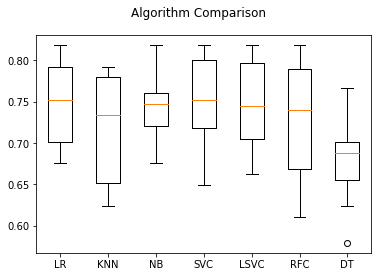

In [77]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 5. Impute & Normalize

In [24]:
dataset  = pd.read_csv("diabetes.csv")
median_bmi = dataset['BMI'].std()
dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

median_bloodp = dataset['BloodPressure'].std()
dataset['BloodPressure'] = dataset['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

median_plglcconc = dataset['Glucose'].std()
dataset['Glucose'] = dataset['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

median_skinthick = dataset['SkinThickness'].std()
dataset['SkinThickness'] = dataset['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

median_Insulin = dataset['Insulin'].std()
dataset['Insulin'] = dataset['Insulin'].replace(
    to_replace=0, value=median_Insulin)

median_DiabetesPedigreeFunction = dataset['DiabetesPedigreeFunction'].std()
dataset['DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].replace(
    to_replace=0, value=median_DiabetesPedigreeFunction)

median_Age = dataset['Age'].std()
dataset['Age'] = dataset['Age'].replace(
    to_replace=0, value=median_Age)


# file create for normalization 

y = dataset["Outcome"].copy()
x = dataset.drop("Outcome", axis=1)

from sklearn.preprocessing import MinMaxScaler as Normalizer

scaler = Normalizer()
scaler.fit(x)
train_set_scaled = scaler.transform(x)

datafram = pd.DataFrame(data=train_set_scaled)
#datafram.to_csv("diabetes_std_impute_normalization.csv", index=False, encoding="utf-8")


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

train_set_labels = train_set["Outcome"].copy()
train_set = train_set.drop("Outcome", axis=1)

test_set_labels = test_set["Outcome"].copy()
test_set = test_set.drop("Outcome", axis=1)

In [26]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

df = pd.DataFrame(data=train_set_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.013648,0.573228,0.132087,0.108860,0.786441,0.053803,0.002075,0.143307
1,0.047106,0.586210,0.429190,0.125616,0.603189,0.147599,0.006710,0.261701
2,0.005774,0.802569,0.265598,0.109704,0.479232,0.165710,0.003776,0.127025
3,0.000000,0.745328,0.231468,0.073849,0.533507,0.101383,0.001176,0.300909
4,0.014686,0.327991,0.195815,0.090565,0.905646,0.113083,0.000583,0.112594


In [27]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [28]:
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

In [29]:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (
        name, cv_results.mean())
    print(msg)

LR: 0.643205 
KNN: 0.674432 
NB: 0.643416 


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\

SVC: 0.653014 
LSVC: 0.649788 


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-package

RFC: 0.688815 
DT: 0.623770 


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## PCA in normalization and impute

In [15]:
from sklearn.decomposition import PCA
import numpy

dataset = numpy.loadtxt("diabetes_std_impute_normalization.txt", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]


pca = PCA(n_components=2).fit(X)
train_set = pca.transform(X)

print(train_set)

[[ 0.32848414  0.04767619]
 [-0.22643479 -0.10992424]
 [ 0.23699816  0.07104916]
 ...
 [-0.00726968 -0.08620371]
 [ 0.02014254 -0.02871416]
 [-0.27715052 -0.02236748]]


In [16]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DT', DecisionTreeClassifier(min_samples_split = 12)))

In [17]:
seed = 7
results = []
names = []
X = train_set

In [18]:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (
        name, cv_results.mean())
    print(msg)

LR: 0.747454 
KNN: 0.715960 
NB: 0.744805 
SVC: 0.750085 


C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nazmus Sakib\Anaconda3\lib\site-packages\sklearn\

LSVC: 0.747471 
RFC: 0.736910 
DT: 0.684740 
